In [1]:
# 필요한 라이브러리 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 재완 
train = 'C:\\Users\\82104\\Desktop\\데이터분석\\1. 신용카드 사용자 연체 예측\data\\train.csv'
test = 'C:\\Users\\82104\\Desktop\\데이터분석\\1. 신용카드 사용자 연체 예측\data\\test.csv'
# # 관우
# train = 'C:\\Users\\82106\\Desktop\\2022\\dacon\\train.csv'
# test = 'C:\\Users\\82106\\Desktop\\2022\\dacon\\test.csv'
df_train = pd.read_csv(train)
df_test = pd.read_csv(test) 

In [3]:
df_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
df_train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [5]:
# 데이터 기초 정보탐색
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

<AxesSubplot:>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


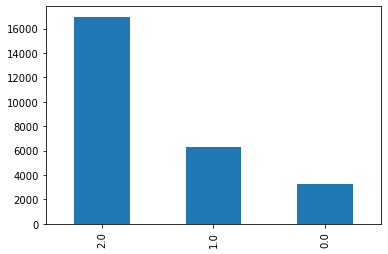

In [6]:
# credit 분포 정도확인
df_train['credit'].value_counts().plot.bar()

In [7]:
# 결측치 확인 >> occyp_type에만 있음 >> 31퍼센트가 결측치
print(df_train.isnull().sum())
occ_null_rate = 8171 / 26457
print('rate : %.2f'%occ_null_rate)

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64
rate : 0.31


In [8]:
# 더미변수화 전에 질적변수 별 몇개의 종류가 있는지 확인
# income_type
print(df_train['income_type'].unique())
print(df_train['edu_type'].unique())
print(df_train['family_type'].unique())
print(df_train['house_type'].unique())
print(df_train['occyp_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']
[nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']


In [9]:
# 직업종류와 개수확인
df_train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

occyp_type
Accountants              1.486696
Cleaning staff           1.570720
Cooking staff            1.505470
Core staff               1.502646
Drivers                  1.535238
HR staff                 1.709677
High skill tech staff    1.503846
IT staff                 1.365854
Laborers                 1.500443
Low-skill Laborers       1.488189
Managers                 1.530226
Medicine staff           1.586806
Private service staff    1.485597
Realty agents            1.539683
Sales staff              1.513194
Secretaries              1.494845
Security staff           1.608491
Waiters/barmen staff     1.435484
Name: credit, dtype: float64


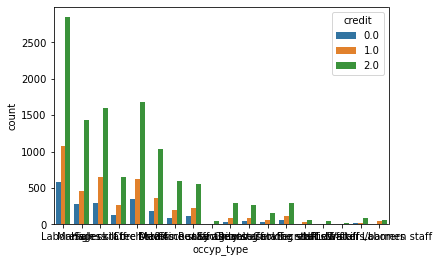

In [10]:
# 직업별 credit 차이가 있는지 확인
import seaborn as sns
print(df_train.groupby(['occyp_type'])['credit'].mean())
ax = sns.countplot(x='occyp_type',hue='credit',data=df_train)

In [11]:
# 전처리를 위해 train데이터와 test데이터 병합
whole_df = df_train.append(df_test)
# train 로우 개수 미리 확인(다시 나눠야 하니깐)
train_df_num = len(df_train)

In [12]:
# index 칼럼 삭제
whole_df = whole_df.drop('index',axis=1)

In [13]:
# 데이터 전처리
# 1. Y,F를 1과 0으로 치환
whole_df.replace('Y',1,inplace=True)
whole_df.replace('N',0,inplace=True)
whole_df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [14]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         36457 non-null  object 
 1   car            36457 non-null  int64  
 2   reality        36457 non-null  int64  
 3   child_num      36457 non-null  int64  
 4   income_total   36457 non-null  float64
 5   income_type    36457 non-null  object 
 6   edu_type       36457 non-null  object 
 7   family_type    36457 non-null  object 
 8   house_type     36457 non-null  object 
 9   DAYS_BIRTH     36457 non-null  int64  
 10  DAYS_EMPLOYED  36457 non-null  int64  
 11  FLAG_MOBIL     36457 non-null  int64  
 12  work_phone     36457 non-null  int64  
 13  phone          36457 non-null  int64  
 14  email          36457 non-null  int64  
 15  occyp_type     25134 non-null  object 
 16  family_size    36457 non-null  float64
 17  begin_month    36457 non-null  float64
 18  credit 

In [15]:
# 일단 occyp_type 변수 제외한 데이터프레임 만들기
whole_df_n_occ = whole_df[whole_df.columns.difference(['occyp_type'])]
# occyp_type과 credit만 있는 프레임 만들기
df_occ_with_credit = whole_df[['occyp_type','credit']]
df_occ_with_credit.head()

,occyp_type,credit
0,NaN,1.0
1,Laborers,1.0
2,Managers,2.0
3,Sales staff,0.0
4,Managers,2.0


In [16]:
# 질적변수들 모두 더미변수화 진행(원핫인코딩)
whole_df_encoding = pd.get_dummies(whole_df_n_occ)
whole_df_encoding.head()

,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,begin_month,car,child_num,credit,email,family_size,income_total,...,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working
0,-13899,-4709,1,-6.0,0,0,1.0,0,2.0,202500.0,...,0,1,0,0,0,1,0,0,0,0
1,-11380,-1540,1,-5.0,0,1,1.0,1,3.0,247500.0,...,1,0,0,0,0,1,0,0,0,0
2,-19087,-4434,1,-22.0,1,0,2.0,0,2.0,450000.0,...,1,0,0,0,0,0,0,0,0,1
3,-15088,-2092,1,-37.0,0,0,0.0,0,2.0,202500.0,...,1,0,0,0,0,1,0,0,0,0
4,-15037,-2105,1,-26.0,1,0,2.0,0,2.0,157500.0,...,1,0,0,0,0,0,0,1,0,0


In [17]:
# days_employed 예외처리 + 실업자(not_employed) 변수 새로 생성 
whole_df_encoding.loc[whole_df_encoding['DAYS_EMPLOYED']==365243,'DAYS_EMPLOYED']=0
whole_df_encoding['not_employed']=whole_df_encoding['DAYS_EMPLOYED']
whole_df_encoding.loc[whole_df_encoding['not_employed']==0,'not_employed']=1
whole_df_encoding.loc[whole_df_encoding['not_employed']<0,'not_employed']=0

In [18]:
# 양적 변수들 스케일링 진행해야함(여기서 credit은 빼주어야한다)
columns = ['DAYS_BIRTH','DAYS_EMPLOYED','income_total','family_size','begin_month','child_num']

def scalingdf(df,columns):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = df[col].apply(lambda x:(x-mean)/std)
    return df

# 스케일링 진행
scalingdf(whole_df_encoding,columns)

,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,begin_month,car,child_num,credit,email,family_size,income_total,...,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,not_employed
0,0.494262,-1.059949,1,1.221935,0,-0.579653,1.0,0,-0.217677,0.155363,...,1,0,0,0,1,0,0,0,0,0
1,1.093946,0.278992,1,1.282534,0,0.767390,1.0,1,0.879192,0.597453,...,0,0,0,0,1,0,0,0,0,0
2,-0.740814,-0.943758,1,0.252347,1,-0.579653,2.0,0,-0.217677,2.586858,...,0,0,0,0,0,0,0,0,1,0
3,0.211204,0.045765,1,-0.656642,0,-0.579653,0.0,0,-0.217677,0.155363,...,0,0,0,0,1,0,0,0,0,0
4,0.223345,0.040273,1,0.009950,1,-0.579653,2.0,0,-0.217677,-0.286727,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.623210,-1.366270,1,0.434145,1,-0.579653,NaN,0,-0.217677,0.155363,...,0,0,0,0,0,0,0,0,1,0
9996,1.211549,0.374057,1,-0.474844,1,-0.579653,NaN,0,-0.217677,0.155363,...,0,0,0,0,0,0,0,0,1,0
9997,-1.200040,-4.993113,1,-1.747428,0,-0.579653,NaN,0,-0.217677,1.039543,...,0,0,0,0,0,0,0,0,1,0
9998,-0.134703,0.471235,1,-0.414245,1,-0.579653,NaN,0,-0.217677,-0.065682,...,0,0,0,0,1,0,0,0,0,0


In [19]:
whole_df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DAYS_BIRTH                              36457 non-null  float64
 1   DAYS_EMPLOYED                           36457 non-null  float64
 2   FLAG_MOBIL                              36457 non-null  int64  
 3   begin_month                             36457 non-null  float64
 4   car                                     36457 non-null  int64  
 5   child_num                               36457 non-null  float64
 6   credit                                  26457 non-null  float64
 7   email                                   36457 non-null  int64  
 8   family_size                             36457 non-null  float64
 9   income_total                            36457 non-null  float64
 10  phone                                   36457 non-null  int

In [20]:
# 다시 데이터 트레인과 test로 분리
df_train = whole_df_encoding[:train_df_num]
df_test = whole_df_encoding[train_df_num:]

In [21]:
df_train.head()
df_train.info()
# train데이터와 검증용 데이터로 분리

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DAYS_BIRTH                              26457 non-null  float64
 1   DAYS_EMPLOYED                           26457 non-null  float64
 2   FLAG_MOBIL                              26457 non-null  int64  
 3   begin_month                             26457 non-null  float64
 4   car                                     26457 non-null  int64  
 5   child_num                               26457 non-null  float64
 6   credit                                  26457 non-null  float64
 7   email                                   26457 non-null  int64  
 8   family_size                             26457 non-null  float64
 9   income_total                            26457 non-null  float64
 10  phone                                   26457 non-null  in

In [22]:
# 필요한 라이브러리 설치
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df_train['credit']
# X는 행렬이므로 대문자로 표시
X = df_train[df_train.columns.difference(['credit'])]

# df_train을 학습용과 검증용 데이터로 8:2 로 나눔
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state= 1)

In [23]:
# # 스케일링을 라이브러리에서 들고와서 적용하는 방법
# from sklearn.preprocessing import StandardScaler

# # StandardScaler( )로 평균이 0, 분산 1로 데이터 분포 변환
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [24]:
X_train

,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,begin_month,car,child_num,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,...,income_total,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,not_employed,phone,reality,work_phone
15974,0.544256,0.434476,1,0.070549,0,0.767390,0,0,0,0,...,-0.507772,1,0,0,0,0,0,0,0,0
1655,1.487942,0.870931,1,-1.505031,1,0.767390,0,0,0,0,...,-0.286727,0,0,0,0,1,0,0,0,0
18929,-0.962214,0.207165,1,-0.474844,0,-0.579653,0,0,0,0,...,-0.728817,1,0,0,0,0,0,0,1,1
20071,-0.876511,-0.242388,1,-1.020237,1,-0.579653,0,0,0,0,...,-0.861444,0,0,0,0,1,0,1,0,0
21697,0.708520,0.270542,1,-0.050649,1,-0.579653,0,1,0,0,...,11.428658,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.602105,-0.219572,1,-0.293046,0,2.114433,0,0,0,0,...,0.155363,0,0,0,0,1,0,0,0,0
17289,-0.882462,-0.709686,1,0.676542,0,-0.579653,0,1,0,0,...,3.028948,1,0,0,0,0,0,1,1,0
5192,1.477705,0.889522,1,-0.777840,0,-0.579653,0,0,0,0,...,0.376408,0,0,0,0,1,0,0,0,0
12172,-1.096958,0.929660,1,-1.080836,0,-0.579653,0,1,0,0,...,-0.728817,0,1,0,0,0,1,1,0,0


In [25]:
# 로지스틱 모델 학습
model = LogisticRegression(solver='liblinear', multi_class='auto',
                       C=100.0, random_state=1)
model.fit(X_train,y_train)

model2 = LogisticRegression(solver='newton-cg',random_state=1,multi_class= 'multinomial',C=100)
model2.fit(X_train,y_train)

# 모델 검증
y_pred = model.predict(X_test)
y_pred_probability = model.predict_proba(X_test)
y_pred2 = model2.predict(X_test)
y_pred_probability2 = model2.predict_proba(X_test)
print('전체 샘플 개수: %d'% y_test.sum())
print('잘못 분류된 샘플 개수(모델1): %d' % (y_test != y_pred).sum())
print('잘못 분류된 샘플 개수(모델2): %d' % (y_test != y_pred2).sum())

전체 샘플 개수: 8035
잘못 분류된 샘플 개수(모델1): 1902
잘못 분류된 샘플 개수(모델2): 1901


In [26]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train,y_train)
y_pred4 = dtc.predict(X_test)
print('잘못 분류된 샘플 개수(의사결정트리): %d' % (y_test != y_pred4).sum())

잘못 분류된 샘플 개수(의사결정트리): 2068


In [27]:
#랜덤 포레스트 모델 학습
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1,n_estimators=1000)

model_rf.fit(X_train,y_train)
y_pred3 = model_rf.predict(X_test)
print('잘못 분류된 샘플 개수(랜덤포레스트): %d' % (y_test != y_pred3).sum())

잘못 분류된 샘플 개수(랜덤포레스트): 1579


<AxesSubplot:>

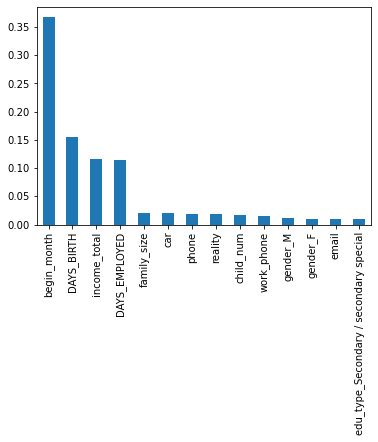

In [28]:
# 피처별 중요도 >> 중요도 순으로 0.01이상인 변수만 모델링에 추가하기로 함
feature_scores = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores=feature_scores[feature_scores>0.01]
feature_scores.plot.bar()

In [29]:
# 분류모델의 평가
print("로지스틱회귀모델1 Accuracy: %.2f"% accuracy_score(y_test,y_pred))
print("로지스틱회귀모델2 Accuracy: %.2f"% accuracy_score(y_test,y_pred2))
print("의사결정트리모델 Accuracy: %.2f"% accuracy_score(y_test,y_pred4))
print("랜덤포레스트모델 Accuracy: %.2f"% accuracy_score(y_test,y_pred3))

로지스틱회귀모델1 Accuracy: 0.64
로지스틱회귀모델2 Accuracy: 0.64
의사결정트리모델 Accuracy: 0.61
랜덤포레스트모델 Accuracy: 0.70


In [30]:
# 피처 축소한 데이터 프레임
columns = feature_scores.index.tolist()
columns.append('credit')
columns
revised_df=whole_df_encoding[columns]
revised_df=revised_df.drop(['edu_type_Secondary / secondary special'],axis=1)
revised_df

,begin_month,DAYS_BIRTH,income_total,DAYS_EMPLOYED,family_size,car,phone,reality,child_num,work_phone,gender_M,gender_F,email,credit
0,1.221935,0.494262,0.155363,-1.059949,-0.217677,0,0,0,-0.579653,0,0,1,0,1.0
1,1.282534,1.093946,0.597453,0.278992,0.879192,0,0,1,0.767390,0,0,1,1,1.0
2,0.252347,-0.740814,2.586858,-0.943758,-0.217677,1,1,1,-0.579653,0,1,0,0,2.0
3,-0.656642,0.211204,0.155363,0.045765,-0.217677,0,1,1,-0.579653,0,0,1,0,0.0
4,0.009950,0.223345,-0.286727,0.040273,-0.217677,1,0,1,-0.579653,0,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.434145,-0.623210,0.155363,-1.366270,-0.217677,1,1,1,-0.579653,1,0,1,0,NaN
9996,-0.474844,1.211549,0.155363,0.374057,-0.217677,1,0,1,-0.579653,1,1,0,0,NaN
9997,-1.747428,-1.200040,1.039543,-4.993113,-0.217677,0,0,1,-0.579653,0,0,1,0,NaN
9998,-0.414245,-0.134703,-0.065682,0.471235,-0.217677,1,1,0,-0.579653,0,0,1,0,NaN


In [31]:
revised_df.head(16)

,begin_month,DAYS_BIRTH,income_total,DAYS_EMPLOYED,family_size,car,phone,reality,child_num,work_phone,gender_M,gender_F,email,credit
0,1.221935,0.494262,0.155363,-1.059949,-0.217677,0,0,0,-0.579653,0,0,1,0,1.0
1,1.282534,1.093946,0.597453,0.278992,0.879192,0,0,1,0.767390,0,0,1,1,1.0
2,0.252347,-0.740814,2.586858,-0.943758,-0.217677,1,1,1,-0.579653,0,1,0,0,2.0
3,-0.656642,0.211204,0.155363,0.045765,-0.217677,0,1,1,-0.579653,0,0,1,0,0.0
4,0.009950,0.223345,-0.286727,0.040273,-0.217677,1,0,1,-0.579653,0,0,1,0,2.0
5,0.494744,0.609961,0.818498,-1.181210,1.976061,0,0,1,2.114433,0,0,1,1,1.0
6,-0.899039,-0.379671,1.260588,0.093932,-1.314546,0,0,0,-0.579653,0,0,1,1,2.0
7,-1.626230,0.256912,0.818498,-1.360355,-0.217677,0,0,1,-0.579653,0,1,0,1,0.0
8,-0.717241,0.200967,-0.065682,0.310258,0.879192,1,0,1,0.767390,0,1,0,1,2.0
9,1.282534,0.045273,-0.817235,0.377015,-0.217677,0,0,1,-0.579653,0,0,1,0,2.0


In [32]:
# 다시 데이터 트레인과 test로 분리
df_train = revised_df[:train_df_num]
df_test = revised_df[train_df_num:]
df_train

,begin_month,DAYS_BIRTH,income_total,DAYS_EMPLOYED,family_size,car,phone,reality,child_num,work_phone,gender_M,gender_F,email,credit
0,1.221935,0.494262,0.155363,-1.059949,-0.217677,0,0,0,-0.579653,0,0,1,0,1.0
1,1.282534,1.093946,0.597453,0.278992,0.879192,0,0,1,0.767390,0,0,1,1,1.0
2,0.252347,-0.740814,2.586858,-0.943758,-0.217677,1,1,1,-0.579653,0,1,0,0,2.0
3,-0.656642,0.211204,0.155363,0.045765,-0.217677,0,1,1,-0.579653,0,0,1,0,0.0
4,0.009950,0.223345,-0.286727,0.040273,-0.217677,1,0,1,-0.579653,0,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1.464332,0.927539,0.376408,0.091397,1.976061,0,0,0,2.114433,0,0,1,0,1.0
26453,-1.262634,0.162877,-0.065682,-0.116057,-0.217677,0,0,1,0.767390,0,0,1,0,2.0
26454,0.070549,1.402953,1.039543,0.078299,-0.217677,1,0,0,-0.579653,0,0,1,0,2.0
26455,-1.989825,1.387955,-0.154100,0.884452,-1.314546,0,0,1,-0.579653,0,1,0,0,2.0


In [33]:
y = df_train['credit']
# X는 행렬이므로 대문자로 표시
X = df_train[df_train.columns.difference(['credit'])]

# df_train을 학습용과 검증용 데이터로 8:2 로 나눔
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state= 1)

In [34]:
# 변수선택후 다시 랜덤포레스트 진행결과 잘못 분류된 샘플개수가 7개 밖에 증가 안함>> 이대로 모델링 진행
model_rf = RandomForestClassifier(random_state=1,n_estimators=1000)

model_rf.fit(X_train,y_train)
y_pred3 = model_rf.predict(X_test)
print('잘못 분류된 샘플 개수(랜덤포레스트): %d' % (y_test != y_pred3).sum())

잘못 분류된 샘플 개수(랜덤포레스트): 1587


<AxesSubplot:>

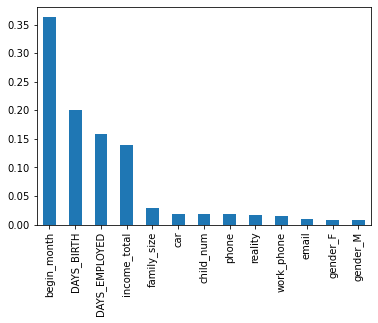

In [35]:
# 피처별 중요도
feature_scores = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)


feature_scores.plot.bar()

# 이상치 처리

In [36]:
# *** 우리가 학습시키는 데이터는 df_train이므로 전체 데이터인 revised_df로 이상치를 처리하면 안됨!!****
# 즉 df_test에서 이상치를 제거하면 안됨

Text(0.5, 1.0, 'child_num')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


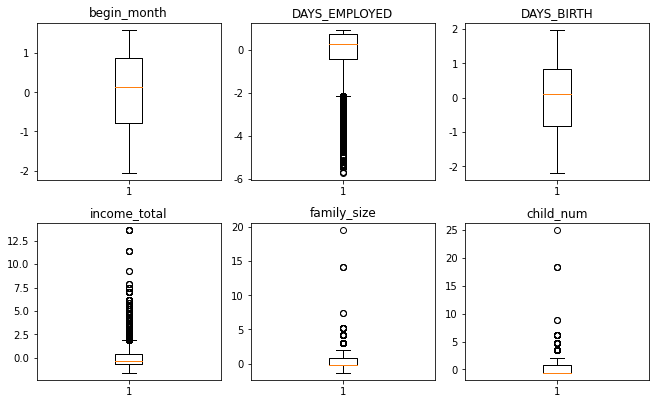

In [37]:
#박스플랏을 통해 변수별 이상치 파악
fig, ax = plt.subplots(2,3,figsize=(9,5.5),constrained_layout=True)
ax[0,0].boxplot(df_train['begin_month'])
ax[0,1].boxplot(df_train['DAYS_EMPLOYED'])
ax[0,2].boxplot(df_train['DAYS_BIRTH'])
ax[1,0].boxplot(df_train['income_total'])
ax[1,1].boxplot(df_train['family_size'])
ax[1,2].boxplot(df_train['child_num'])
ax[0,0].set_title('begin_month')
ax[0,1].set_title('DAYS_EMPLOYED')
ax[0,2].set_title('DAYS_BIRTH')
ax[1,0].set_title('income_total')
ax[1,1].set_title('family_size')
ax[1,2].set_title('child_num')

In [38]:
# skew 정도 파악
df_train.skew()
# skew가 -1보다 작거나 1보다 큰 변수
# income_total, days_employed, family_size, child_num
# income_total, family_size, child_num , work_phone, email, cedit 이정도가 차후에 로그변환해야할 변수

begin_month     -0.290050
DAYS_BIRTH      -0.185986
income_total     2.659271
DAYS_EMPLOYED   -1.764188
family_size      1.431759
car              0.495580
phone            0.903042
reality         -0.742076
child_num        2.852376
work_phone       1.318953
gender_M         0.717818
gender_F        -0.717818
email            2.838422
credit          -1.124384
dtype: float64

### begin_month,days_birth는 이상치 x
다른 변수들  -> 심한 right/left-skewed

다음 네가지 시나리오중 성능 좋은 시나리오 선택
1. 이상치 제거
2. 이상치 변환
3. 변수 로그변환 후 이상치 제거
4. 변수 로그변환 후 이상치 변환

In [39]:
#이상치 탐지 함수 생성
def outliers_iqr(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr=q3-q1
    lower_bound = q1-(iqr*1.5)
    upper_bound = q3+(iqr*1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))

In [40]:
# #train+test때문에 꼬인 index를 초기화, 기존 index삭제
# revised_df.reset_index(drop=False, inplace=True)
# revised_df.drop(['index'],axis=1,inplace=True)

In [41]:
all_size=df_train.shape[0]

In [42]:
#변수별 이상치 인덱스 파악
index_de = outliers_iqr(df_train['DAYS_EMPLOYED'])[0]
index_it = outliers_iqr(df_train['income_total'])[0]
index_fs = outliers_iqr(df_train['family_size'])[0]
index_cn = outliers_iqr(df_train['child_num'])[0]

#변수별 이상치 개수
print('df_train 전체 데이터 :',all_size)
print('DAYS_EMPLOYED :',df_train.loc[index_de,'DAYS_EMPLOYED'].size)
print('income_total :',df_train.loc[index_it,'income_total'].size)
print('family_size :',df_train.loc[index_fs,'family_size'].size)
print('child_num :', df_train.loc[index_cn,'child_num'].size)


df_train 전체 데이터 : 26457
DAYS_EMPLOYED : 1288
income_total : 1129
family_size : 350
child_num : 369


In [43]:
# 중복제외한 총 이상치 인덱스
index_all = np.concatenate([index_de, index_it, index_fs, index_cn],out=None)
outlier_size = index_all.size
# 전체 이상치 비율
print('전체 이상치 수:%d'%outlier_size)
print('이상치 비율 :%.3f'%(outlier_size/all_size))

전체 이상치 수:3136
이상치 비율 :0.119


## 시나리오_1) 이상치 제거

In [44]:
#데이터 복사본 생성
scenario_1=df_train.copy()

In [45]:
# #이상치 데이터 병합(중복제거X)
# index_all = np.concatenate([index_de, index_it, index_fs, index_cn],out=None)

In [46]:
#이상치 제거된 인덱스 리스트 생성
index_final = []
for i in scenario_1.index:
    if i not in index_all:
        index_final.append(i)

In [47]:
#이상치 제거된 데이터
s1_train = scenario_1.loc[index_final]

In [49]:
#모델 적합
y = s1_train['credit']
X = s1_train[s1_train.columns.difference(['credit'])]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state= 1)

In [50]:
model_rf1 = RandomForestClassifier(random_state=1,n_estimators=1000,max_depth= 60,min_samples_leaf= 2)
model_rf1.fit(X_train,y_train)
y_pred = model_rf1.predict(X_test)
print('잘못 분류된 샘플 개수(랜덤포레스트): %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수(랜덤포레스트): 1307


In [51]:
# 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV
params = { 'n_estimators':[500,100,1500],
         'min_samples_leaf': [2,3], 
         'max_depth':[60,70,80]}

In [52]:
rf_clf = RandomForestClassifier(random_state = 1, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 60, 'min_samples_leaf': 2, 'n_estimators': 1500}
최고 예측 정확도: 0.7039


In [53]:
model_rf1 = RandomForestClassifier(random_state=1,n_estimators=1500,max_depth= 60,min_samples_leaf= 2)
model_rf1.fit(X_train,y_train)
y_pred = model_rf1.predict(X_test)
print('잘못 분류된 샘플 개수(랜덤포레스트-이상치 제거): %d' % (y_test != y_pred).sum())
print("랜덤포레스트모델 Accuracy: %.3f"% accuracy_score(y_test,y_pred))

잘못 분류된 샘플 개수(랜덤포레스트-이상치 제거): 1307
랜덤포레스트모델 Accuracy: 0.725


In [54]:
# 시나리오 1 모델에 테스트 적합
df_test
X_test = df_test[df_test.columns.difference(['credit'])]
y_pred1 = model_rf1.predict(X_test)
y_pred1

array([2., 2., 2., ..., 2., 2., 2.])

## 시나리오_2) 이상치 변환

In [55]:
#iqr을 이용한 상한/하한값 출력함수
def boundary_iqr(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr=q3-q1
    lower_bound = q1-(iqr*1.5)
    upper_bound = q3+(iqr*1.5)
    
    return lower_bound, upper_bound

In [56]:
#시나리오2를 위한 데이터 복사본 생성
scenario_2 = df_train.copy()

#변수별 상한/하한값 파악
print('DAYS_EMPLOYED :',boundary_iqr(scenario_2['DAYS_EMPLOYED']))
print('income_total :',boundary_iqr(scenario_2['income_total']))
print('family_size :',boundary_iqr(scenario_2['family_size']))
print('child_num :',boundary_iqr(scenario_2['child_num']))

DAYS_EMPLOYED : (-2.142846784710486, 2.498024867504117)
income_total : (-2.1656097042904325, 1.9016183738385684)
family_size : (-1.8629799122340827, 2.524494908564713)
child_num : (-2.6002171755548797, 2.78795408602536)


### 상한/하한값 설정
days_employed는 음수값만 존재,  
그외 변수들은 양수값만 존재함으로  
실제 상한/하한값은

DAYS_EMPLOYED : (-7270.5, 0)  
income_total : (0, 380250.0)  
family_size : (0.5, 4.5)  
child_num : (0, 2.5)    
으로 판단  

또 days_employed는 하한값 이하의 이상치만,   
그외 변수들은 상한값 이상의 이상치만 존재함으로  
다음과 같이 이상치를 변환

In [57]:
#이상치 변환
scenario_2.loc[scenario_2['DAYS_EMPLOYED']<-7270.5,'DAYS_EMPLOYED'] = -7270.5
scenario_2.loc[scenario_2['income_total']>380250,'income_total'] = 380250
scenario_2.loc[scenario_2['family_size']>4.5,'family_size']=4.5
scenario_2.loc[scenario_2['child_num']>2.5,'child_num'] = 2.5

In [58]:
s2_train = scenario_2

In [59]:
# 모델적합
y = s2_train['credit']
X = s2_train[s2_train.columns.difference(['credit'])]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state= 1)

In [60]:
model_rf2 = RandomForestClassifier(random_state=1,n_estimators=1500,max_depth= 60,min_samples_leaf= 2)
model_rf2.fit(X_train,y_train)
y_pred = model_rf2.predict(X_test)
print('잘못 분류된 샘플 개수(랜덤포레스트-이상치 변환): %d' % (y_test != y_pred).sum())
print("랜덤포레스트모델 Accuracy: %.3f"% accuracy_score(y_test,y_pred))

잘못 분류된 샘플 개수(랜덤포레스트-이상치 변환): 1499
랜덤포레스트모델 Accuracy: 0.717


## 시나리오_3) 로그변환 후 이상치 제거

In [61]:
#복사본 생성
scenario_3 = df_train.copy()

In [62]:
scenario_3.describe()

,begin_month,DAYS_BIRTH,income_total,DAYS_EMPLOYED,family_size,car,phone,reality,child_num,work_phone,gender_M,gender_F,email,credit
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.002478,0.004076,0.006099,0.000755,-0.001761,0.379748,0.294251,0.673924,-0.002233,0.224742,0.331103,0.668897,0.091280,1.519560
std,1.003496,1.000247,1.000876,1.001413,1.005518,0.485333,0.455714,0.468784,1.006681,0.417420,0.470619,0.470619,0.288013,0.702283
min,-2.050424,-2.184673,-1.568788,-5.709270,-1.314546,0.000000,0.000000,0.000000,-0.579653,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.777840,-0.822708,-0.640399,-0.402520,-0.217677,0.000000,0.000000,0.000000,-0.579653,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.131148,0.101933,-0.286727,0.279414,-0.217677,0.000000,0.000000,1.000000,-0.579653,0.000000,0.000000,1.000000,0.000000,2.000000
75%,0.858339,0.840169,0.376408,0.757698,0.879192,1.000000,1.000000,1.000000,0.767390,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.585530,1.968831,13.639108,0.929660,19.525960,1.000000,1.000000,1.000000,25.014161,1.000000,1.000000,1.000000,1.000000,2.000000


In [63]:
scenario_3.skew()

begin_month     -0.290050
DAYS_BIRTH      -0.185986
income_total     2.659271
DAYS_EMPLOYED   -1.764188
family_size      1.431759
car              0.495580
phone            0.903042
reality         -0.742076
child_num        2.852376
work_phone       1.318953
gender_M         0.717818
gender_F        -0.717818
email            2.838422
credit          -1.124384
dtype: float64

In [64]:
#변수 로그변환(최솟값보고 로그변환이니 0이상이 되도록 수정)
scenario_3['DAYS_EMPLOYED'] = np.log1p(-scenario_3['DAYS_EMPLOYED']+1)
scenario_3['income_total'] = np.log1p(scenario_3['income_total']+2)
scenario_3['family_size'] = np.log1p(scenario_3['family_size']+2)
scenario_3['child_num'] = np.log1p(scenario_3['child_num']+1)

Text(0.5, 1.0, 'child_num')

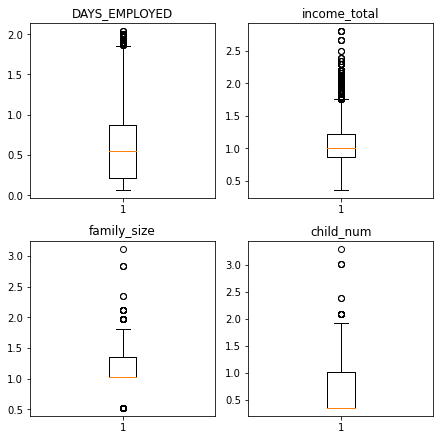

In [65]:
#변환 후 분포 확인
fig, ax = plt.subplots(2,2,figsize=(6,6),constrained_layout=True)
ax[0,0].boxplot(scenario_3['DAYS_EMPLOYED'])
ax[0,1].boxplot(scenario_3['income_total'])
ax[1,0].boxplot(scenario_3['family_size'])
ax[1,1].boxplot(scenario_3['child_num'])
ax[0,0].set_title('DAYS_EMPLOYED')
ax[0,1].set_title('income_total')
ax[1,0].set_title('family_size')
ax[1,1].set_title('child_num')

In [66]:
scenario_3.skew()

begin_month     -0.290050
DAYS_BIRTH      -0.185986
income_total     0.768372
DAYS_EMPLOYED    0.643680
family_size      0.005956
car              0.495580
phone            0.903042
reality         -0.742076
child_num        1.210802
work_phone       1.318953
gender_M         0.717818
gender_F        -0.717818
email            2.838422
credit          -1.124384
dtype: float64

In [67]:
#변수별 이상치 인덱스 파악
index_de = outliers_iqr(scenario_3['DAYS_EMPLOYED'])[0]
index_it = outliers_iqr(scenario_3['income_total'])[0]
index_fs = outliers_iqr(scenario_3['family_size'])[0]
index_cn = outliers_iqr(scenario_3['child_num'])[0]
print('scenario_3 전체 데이터 :',scenario_3.size)
print(scenario_3.loc[index_de,'DAYS_EMPLOYED'].size)
print(scenario_3.loc[index_it,'income_total'].size)
print(scenario_3.loc[index_fs,'family_size'].size)
print(scenario_3.loc[index_cn,'child_num'].size)

scenario_3 전체 데이터 : 370398
86
394
5168
16


In [68]:
# 중복제외한 총 이상치 인덱스
index_all = np.concatenate([index_de, index_it, index_fs, index_cn],out=None)
all_size = scenario_3.shape[0]
outlier_size = index_all.size
# 전체 이상치 비율
print('전체 이상치 수 :',outlier_size)
print('이상치 비율 :%.3f'%(outlier_size/all_size))

전체 이상치 수 : 5664
이상치 비율 :0.214


#### 변환 후 분포 >> 수정필요

원래 이상치
df_train 전체 데이터 : 370398
DAYS_EMPLOYED : 1288
income_total : 1129
family_size : 350
child_num : 369

DAYS_EMPLOYED : 이상치수 비정상적으로 증가  
income_total : 이상치 수 줄고 하한에도 이상치 생겨  
family_size : 이상치 대폭 감소  
child_num : 이상치 대폭 감소  

In [70]:
#DAYS_EMPLOYED는 변환하지 않기로
scenario_3 = df_train.copy()
scenario_3['income_total'] = np.log1p(scenario_3['income_total']+2)
scenario_3['family_size'] = np.log1p(scenario_3['family_size']+2)
scenario_3['child_num'] = np.log1p(scenario_3['child_num']+1)

In [71]:
#변수별 이상치 인덱스 파악
index_it = outliers_iqr(scenario_3['income_total'])[0]
index_fs = outliers_iqr(scenario_3['family_size'])[0]
index_cn = outliers_iqr(scenario_3['child_num'])[0]
index_all = np.concatenate([index_de, index_it, index_fs, index_cn],out=None)
index_all

#이상치 제거된 인덱스 리스트 생성
index_final = []
for i in scenario_3.index:
    if i not in index_all:
        index_final.append(i)

#이상치 제거된 데이터
s3_train = scenario_3.loc[index_final]

In [72]:
#모델 적합
y = s3_train['credit']
X = s3_train[s3_train.columns.difference(['credit'])]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state= 1)

model_rf3 = RandomForestClassifier(random_state=1,n_estimators=1500,max_depth= 60,min_samples_leaf= 2)
model_rf3.fit(X_train,y_train)
y_pred = model_rf3.predict(X_test)
print('잘못 분류된 샘플 개수(랜덤포레스트-로그 변환 후 이상치 제거): %d' % (y_test != y_pred).sum())
print("랜덤포레스트모델 Accuracy: %.3f"% accuracy_score(y_test,y_pred))

잘못 분류된 샘플 개수(랜덤포레스트-로그 변환 후 이상치 제거): 1159
랜덤포레스트모델 Accuracy: 0.723


## 시나리오_4) 로그변환 후 이상치 변환

In [73]:
#데이터 복사본 생성
scenario_4 = df_train.copy()
scenario_4['income_total'] = np.log1p(scenario_4['income_total']+2)
scenario_4['family_size'] = np.log1p(scenario_4['family_size']+2)
scenario_4['child_num'] = np.log1p(scenario_4['child_num']+1)

#변수별 상한/하한값 파악
print(boundary_iqr(scenario_4['income_total']))
print(boundary_iqr(scenario_4['family_size']))
print(boundary_iqr(scenario_4['child_num']))

(0.32101259226028434, 1.754292246994512)
(0.5247753374228131, 1.8541377512349486)
(-0.649603778758542, 2.018409608402578)


In [74]:
#이상치 변환
scenario_4.loc[scenario_4['income_total']>1.754292246994512,'income_total'] = 1.754292246994512
scenario_4.loc[scenario_4['family_size']>1.8541377512349486,'family_size']=1.8541377512349486
scenario_4.loc[scenario_4['child_num']>2.018409608402578,'child_num'] = 2.018409608402578

In [75]:
s4_train= scenario_4
#모델 적합
y = s4_train['credit']
X = s4_train[s1_train.columns.difference(['credit'])]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state= 1)

model_rf4 = RandomForestClassifier(random_state=1,n_estimators=1500,max_depth= 60,min_samples_leaf= 2)
model_rf4.fit(X_train,y_train)
y_pred = model_rf4.predict(X_test)
print('잘못 분류된 샘플 개수(랜덤포레스트-로그 변환 후 이상치 변환): %d' % (y_test != y_pred).sum())
print("랜덤포레스트모델 Accuracy: %.3f"% accuracy_score(y_test,y_pred))

잘못 분류된 샘플 개수(랜덤포레스트-로그 변환 후 이상치 변환): 1505
랜덤포레스트모델 Accuracy: 0.716


# 테스트 모델 적합

In [76]:
# 시나리오 1 모델에 테스트 적합
df_test
X_test = df_test[df_test.columns.difference(['credit'])]
y_pred1 = model_rf1.predict(X_test)
y_pred1 = y_pred1.astype(int)
y_pred1 = y_pred1.astype(object)

In [77]:
# 시나리오 3 모델에 테스트 적합
df_test
X_test = df_test[df_test.columns.difference(['credit'])]
y_pred3 = model_rf3.predict(X_test)
y_pred3 = y_pred3.astype(int)
y_pred3 = y_pred3.astype(object)

In [78]:
# 시나리오1 테스트 결과를 데이터프레임으로 변경
y_pred1_df= pd.DataFrame(y_pred1)
y_pred1_df.columns = ['credit']
y_pred1_df

,credit
0,2
1,2
2,2
3,2
4,2
...,...
9995,2
9996,1
9997,2
9998,2


credit
2         8539
1         1200
0          261
dtype: int64


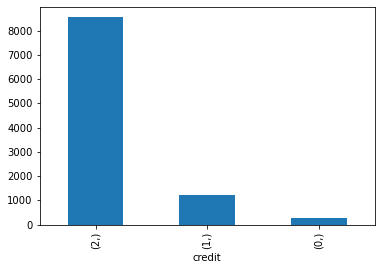

In [79]:
# 데이터 각 신용별 개수확인(시나리오 1)
bar1=y_pred1_df.value_counts().plot.bar()
print(y_pred1_df.value_counts())

In [80]:
y_pred1_df_encoding = pd.get_dummies(y_pred1_df)
y_pred1_df_encoding.columns = ['0','1','2']
y_pred1_df_encoding

,0,1,2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
9995,0,0,1
9996,0,1,0
9997,0,0,1
9998,0,0,1


In [81]:
# 시나리오3 테스트 결과를 데이터프레임으로 변경
y_pred3_df= pd.DataFrame(y_pred3)
y_pred3_df.columns = ['credit']
y_pred3_df

,credit
0,2
1,2
2,2
3,2
4,2
...,...
9995,2
9996,2
9997,2
9998,2


credit
2         7650
1         2240
0          110
dtype: int64


<AxesSubplot:xlabel='credit'>

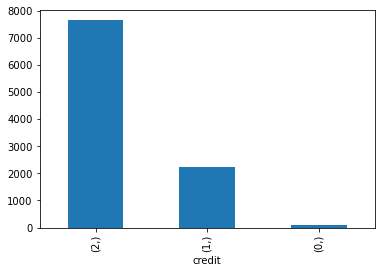

In [82]:
# 데이터 각 신용별 개수확인(시나리오 3)
print(y_pred3_df.value_counts())
y_pred3_df.value_counts().plot.bar()

In [83]:
y_pred3_df_encoding = pd.get_dummies(y_pred3_df)
y_pred3_df_encoding.columns = ['0','1','2']
y_pred3_df_encoding

,0,1,2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,1
9998,0,0,1
